In [289]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy as scp
from statsmodels.tsa.ar_model import AutoReg
from itertools import product
from pylab import rcParams

In [58]:
our_columns = ['icethic_cea', 'iceconc','uice_ipa', 'vice_ipa','snowthic_cea']
df = pd.read_csv('/home/user/Documents/NSS_lab/arctic_TimeSeries_analysis/arctic_results/ts_features.csv', header = None)
df.columns = our_columns
times = pd.date_range('2012-01-01', periods=len(df.index), freq='1h')
df.index = times

<Figure size 432x288 with 0 Axes>

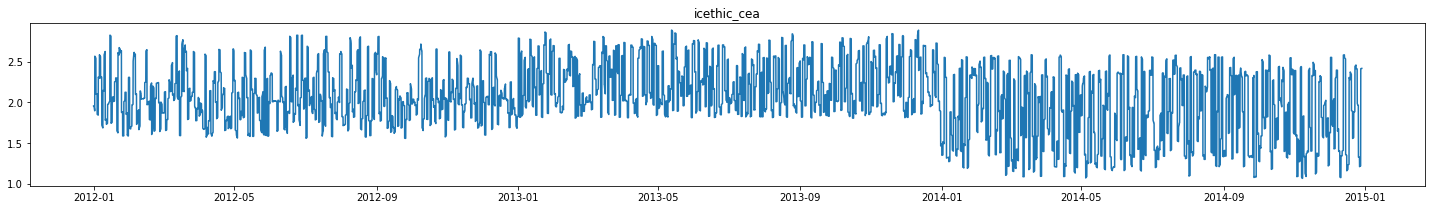

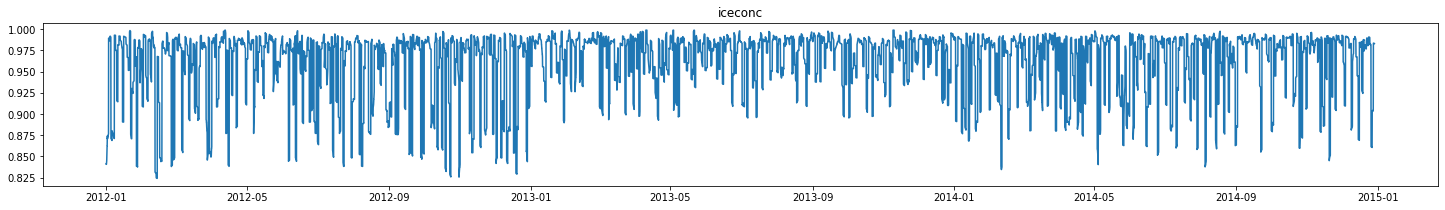

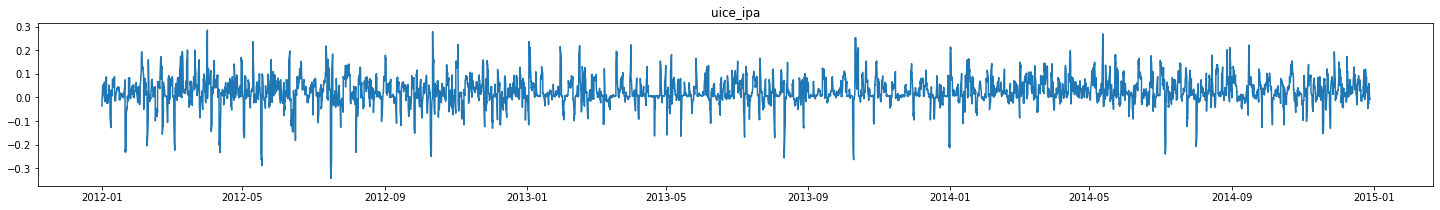

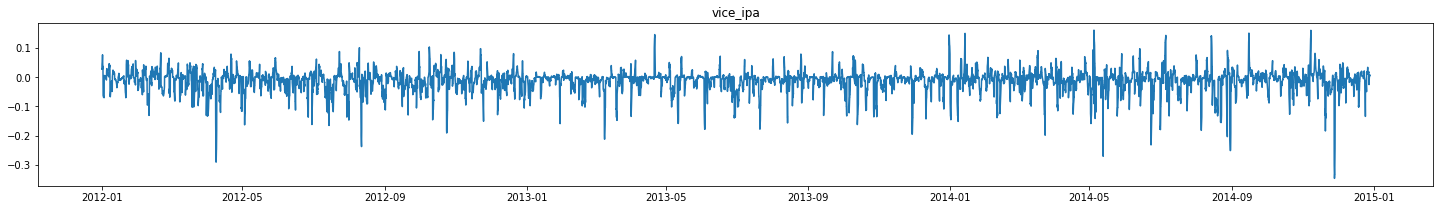

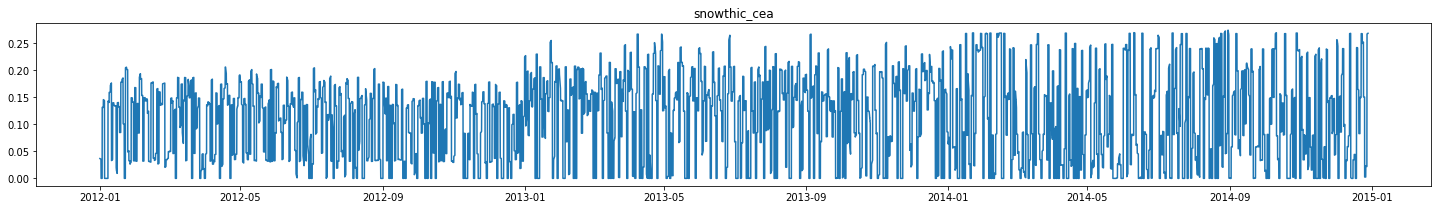

In [22]:
plt.figure()
for column in df.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df[column])
    plt.title(column)

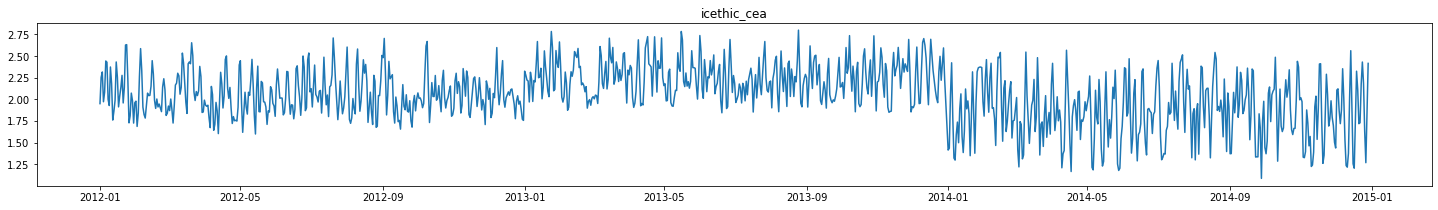

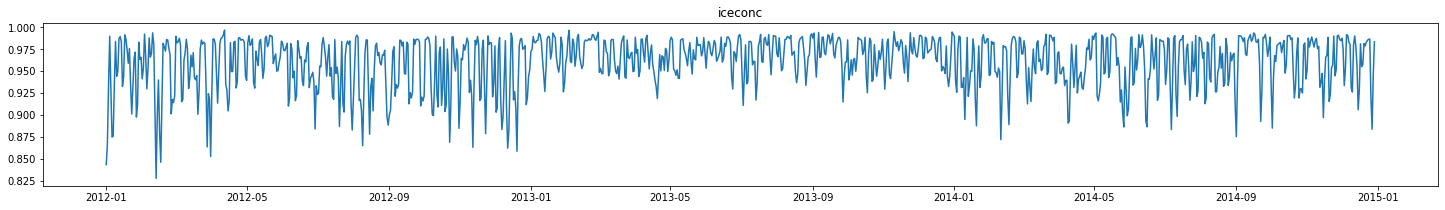

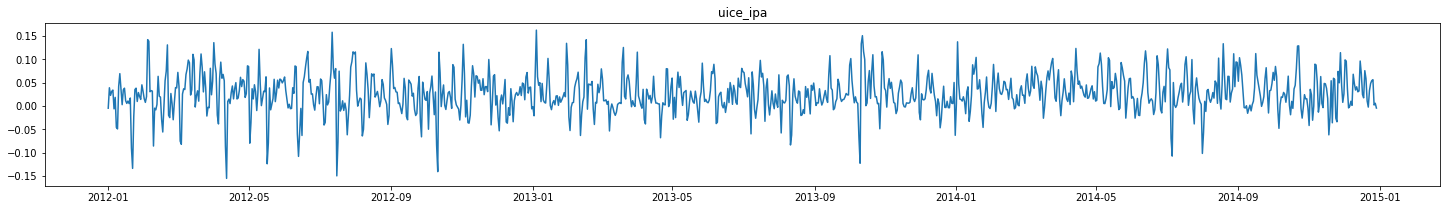

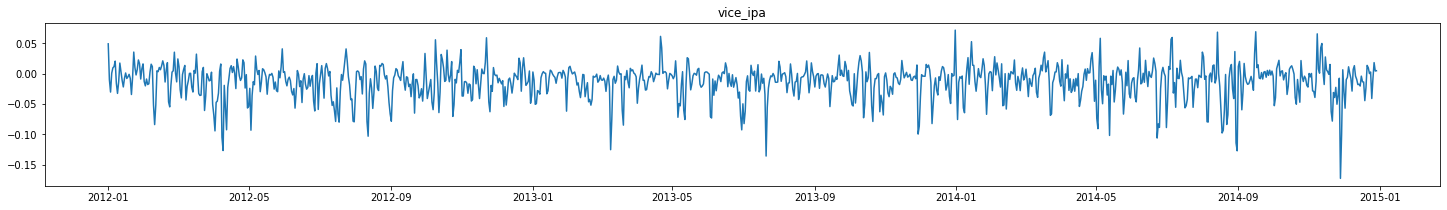

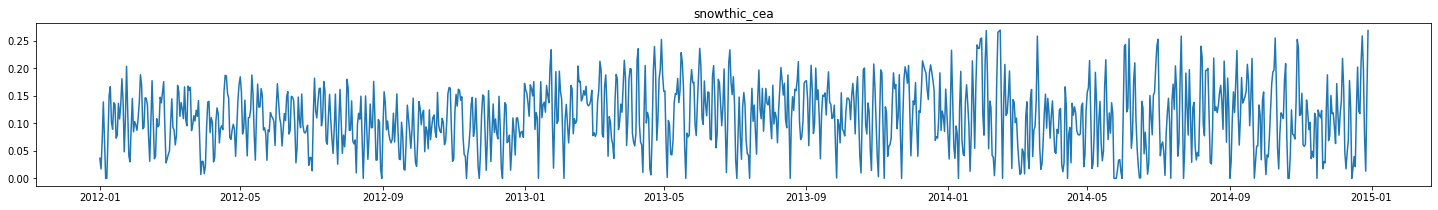

In [260]:
df['dt'] = df.index
df['dt']=df['dt'].dt.round('1d')
dc = {column: 'mean' for column in our_columns}
df_daily = df.groupby('dt').agg(dc)
for column in df_daily.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column])
    plt.title(column)

In [345]:
def stat_tests(data):
    # Dickey-Fuller test
    result = adfuller(data, autolag='AIC')

    if result[1] > 0.05:
        answer = 'Series is not Stationary'
    else:
        answer = 'Series is Stationary'

    print(f'ADF Statistic: {round(result[0],3)}'), print(f'p-value: {round(result[1],4)}'), print(answer)

    return
    

ADF Statistic: 15.221
p-value: 1.0
Series is not Stationary
None


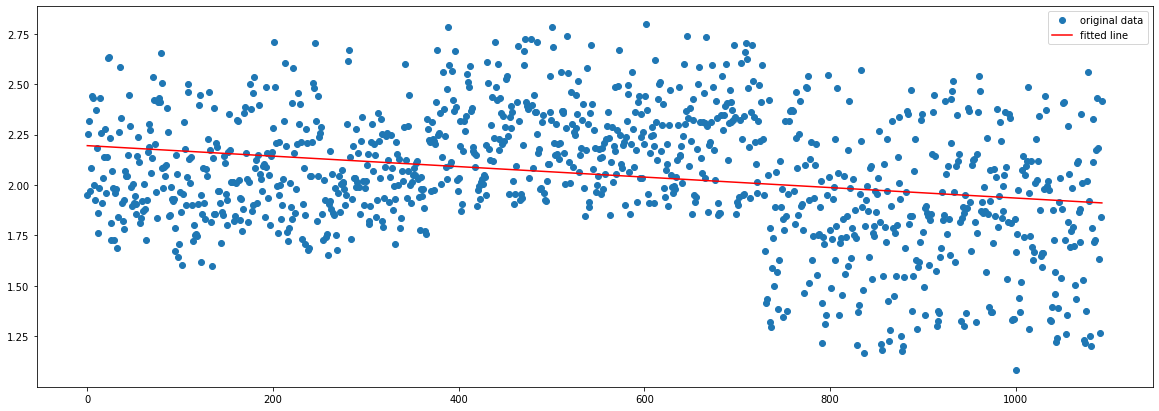

In [346]:
y = df_daily['icethic_cea']
x = np.array([x for x in range(len(y.values))])
lin_reg = scp.stats.linregress(x,y)
statistics = stat_tests(x)
print(statistics)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

ADF Statistic: -4.031
p-value: 0.0013
Series is Stationary
None


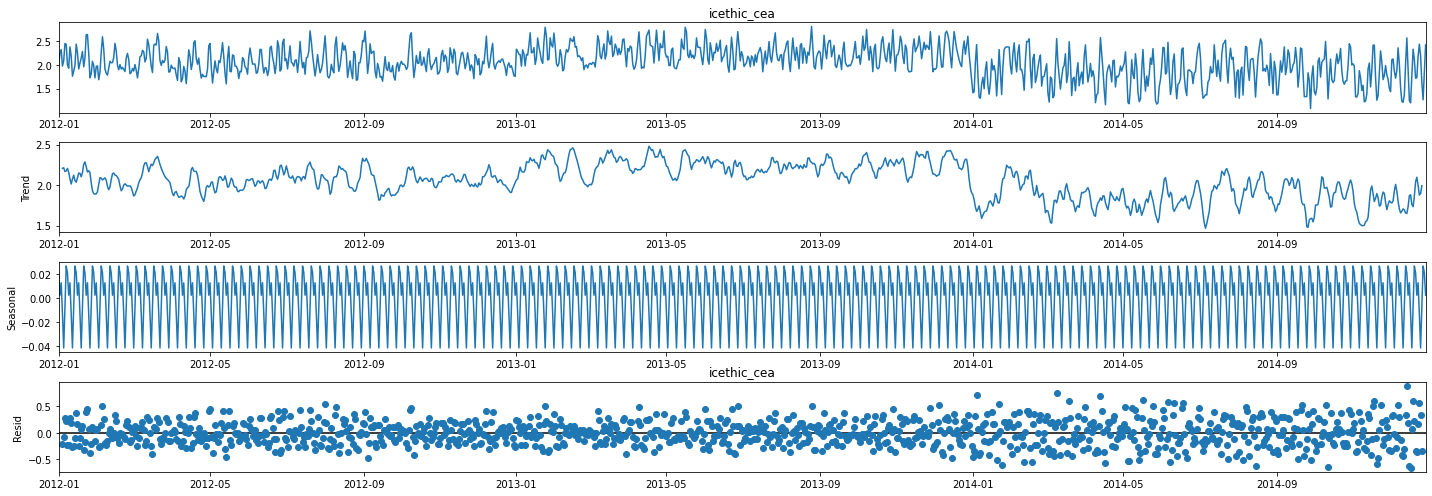

ADF Statistic: -4.406
p-value: 0.0003
Series is Stationary
None


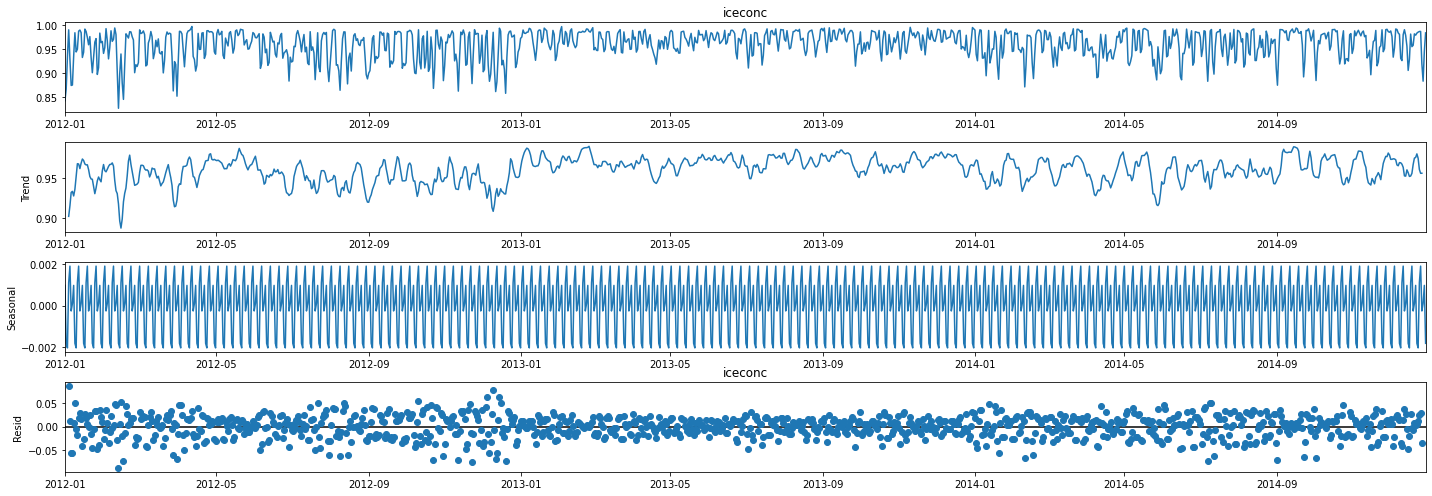

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


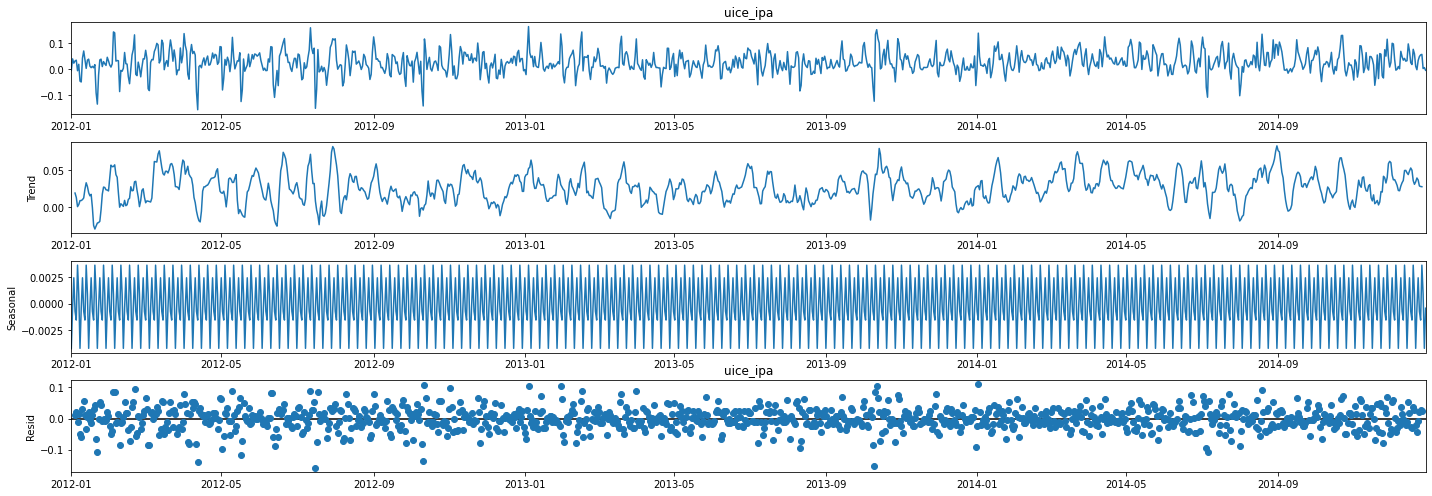

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


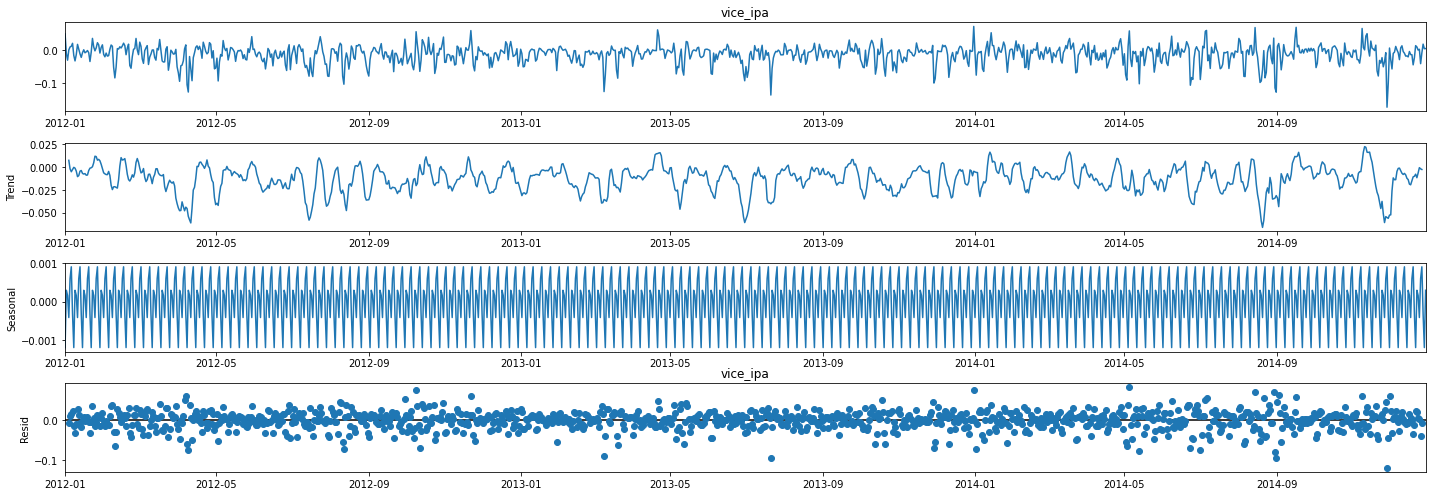

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


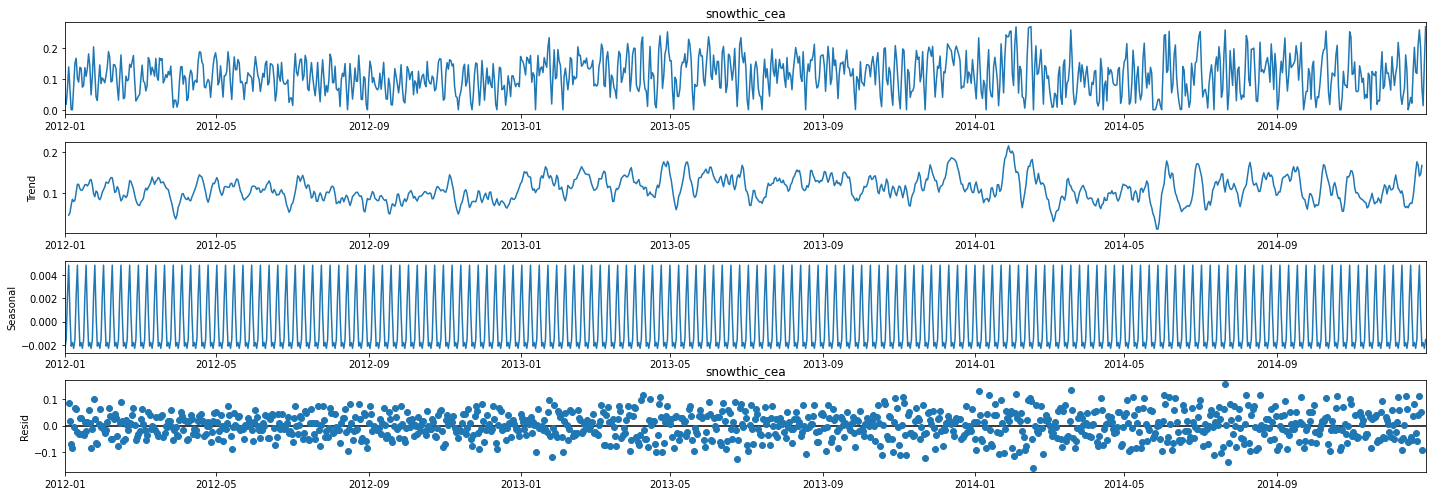

In [347]:
rcParams['figure.figsize'] = 20, 7
for column in df_daily.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(df_daily[column]).plot()
    plt.title(column)
    plt.show()

ADF Statistic: -4.031
p-value: 0.001
Series is Stationary
None


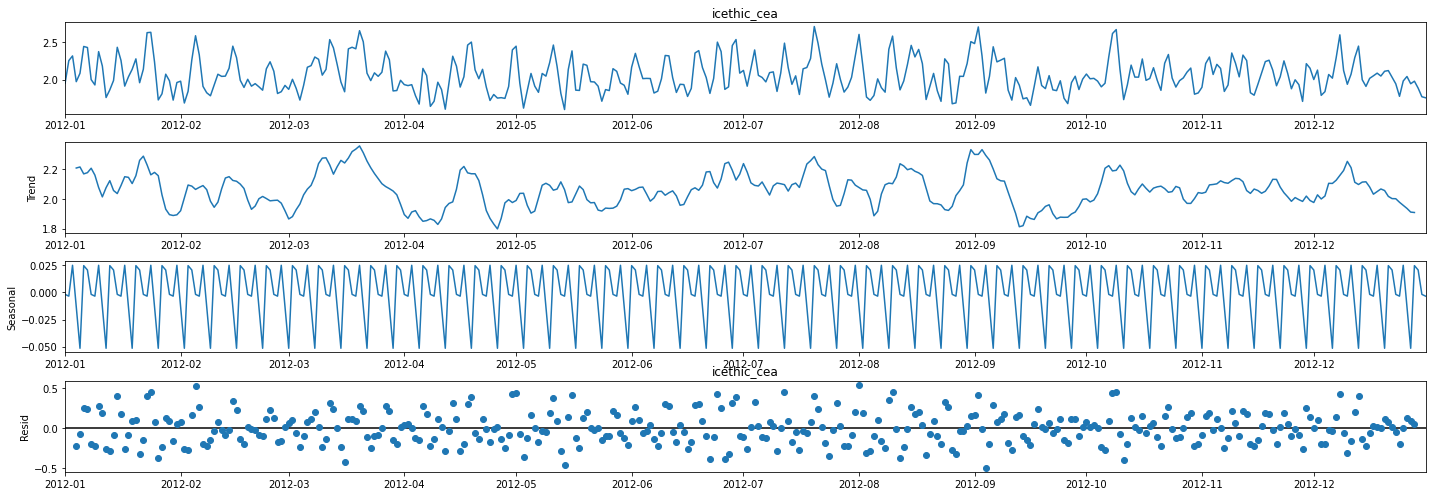

ADF Statistic: -4.406
p-value: 0.0
Series is Stationary
None


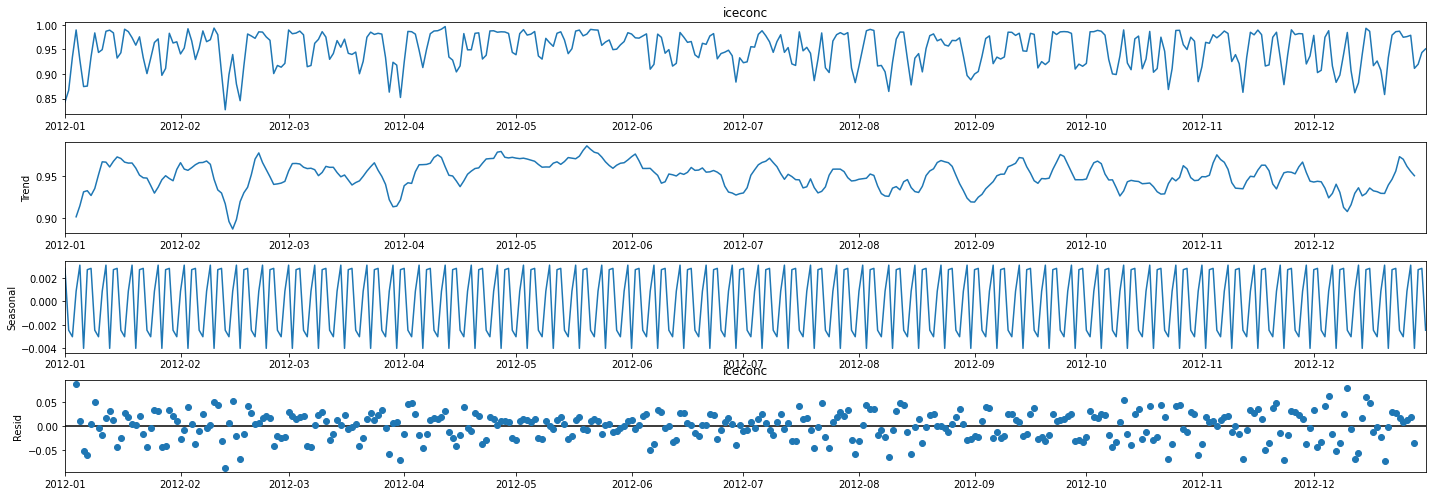

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


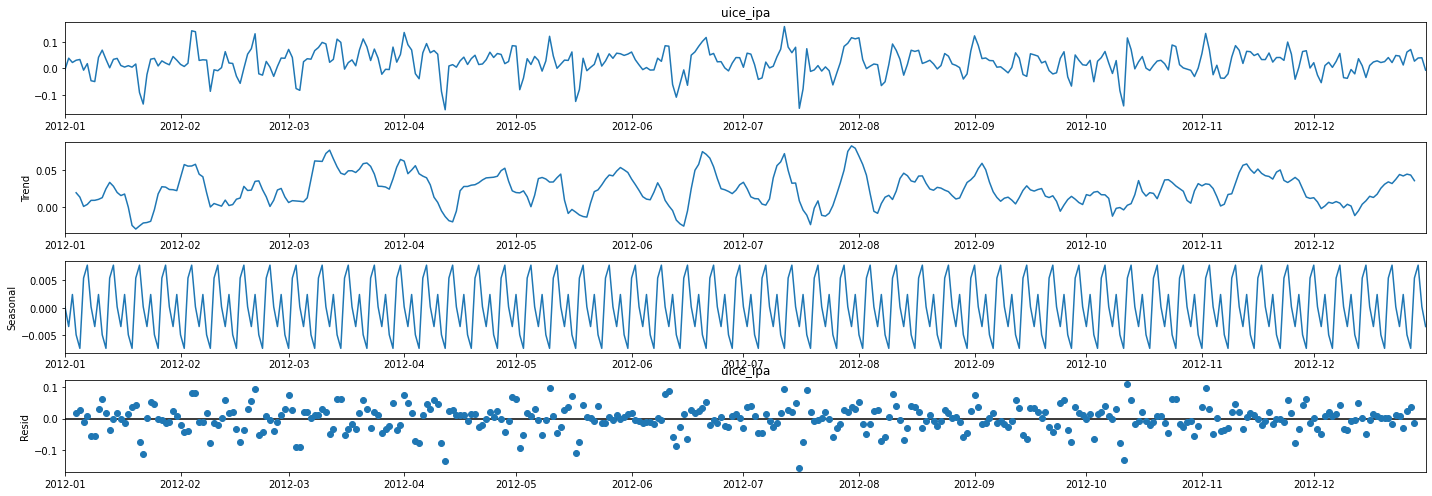

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


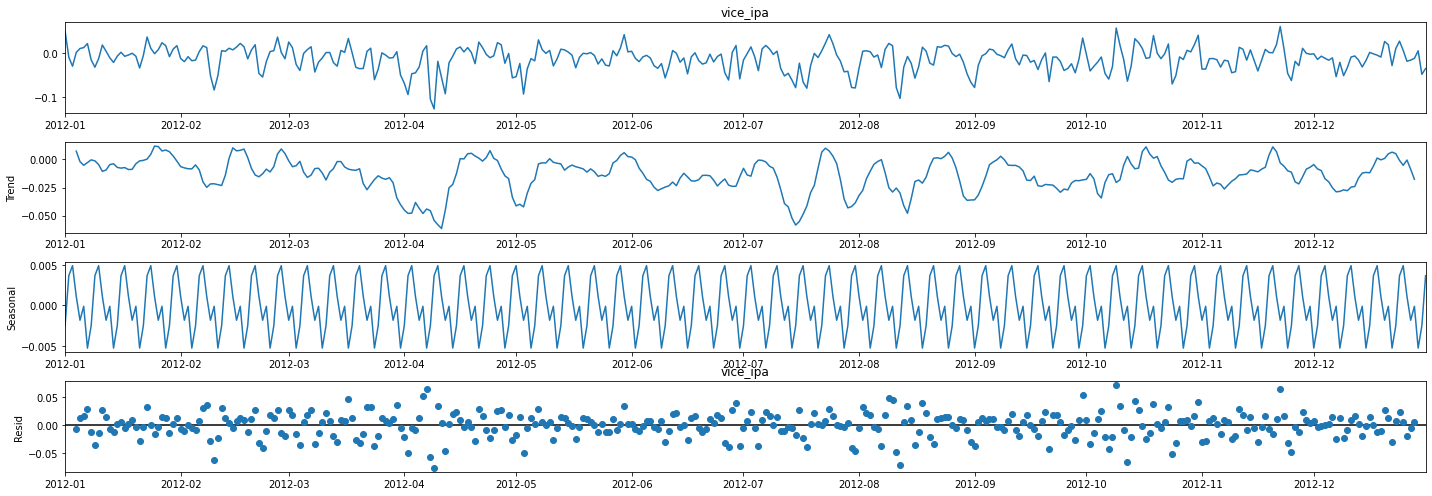

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


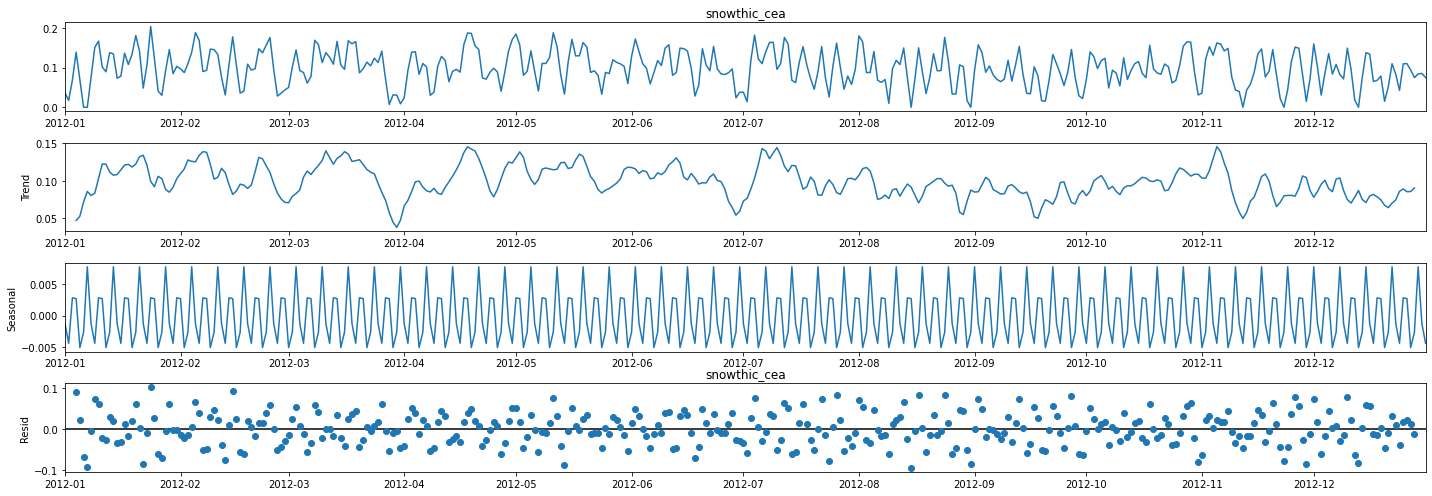

In [221]:
one_year = df_daily.iloc[:366, :].copy()
for column in one_year.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(one_year[column]).plot()
    plt.title(column)
    plt.show()

ADF Statistic: -4.031
p-value: 0.001
Series is Stationary
None


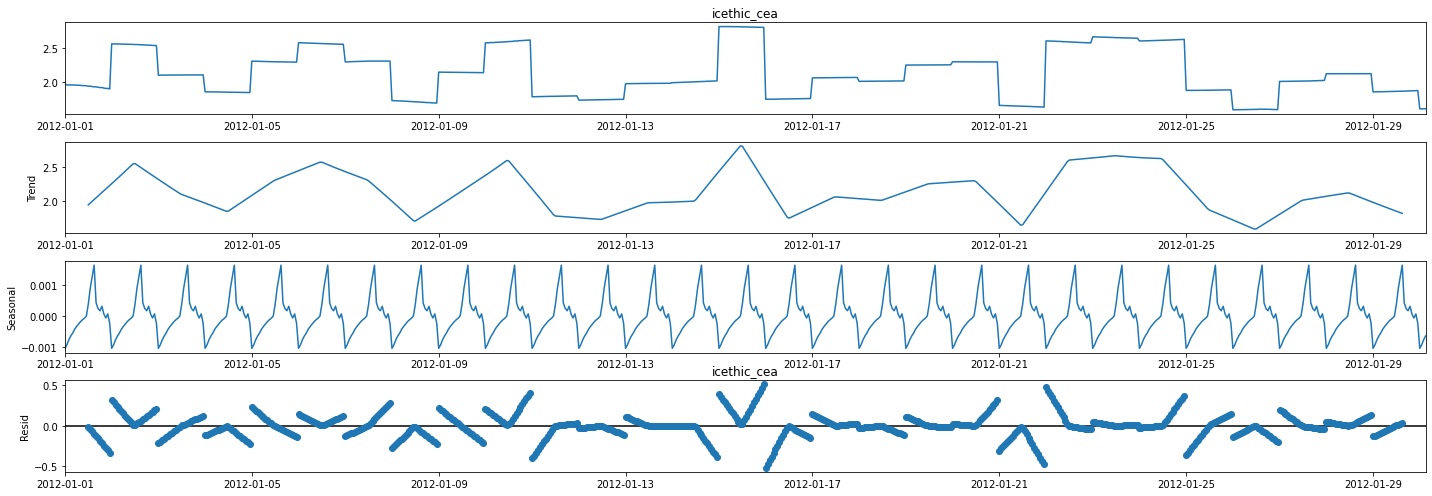

ADF Statistic: -4.406
p-value: 0.0
Series is Stationary
None


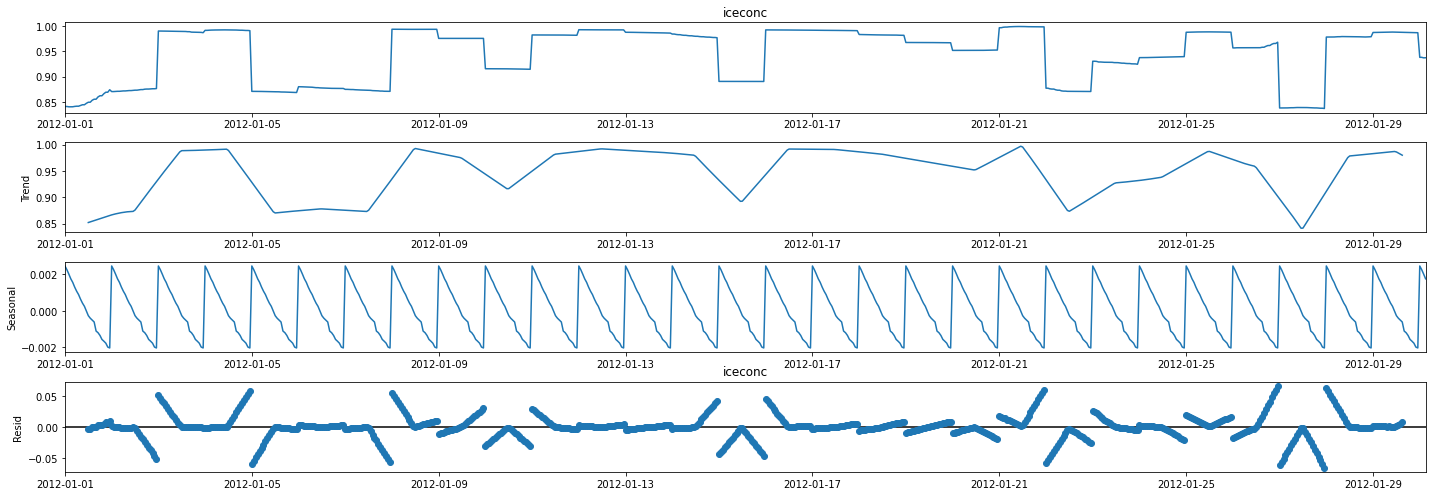

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


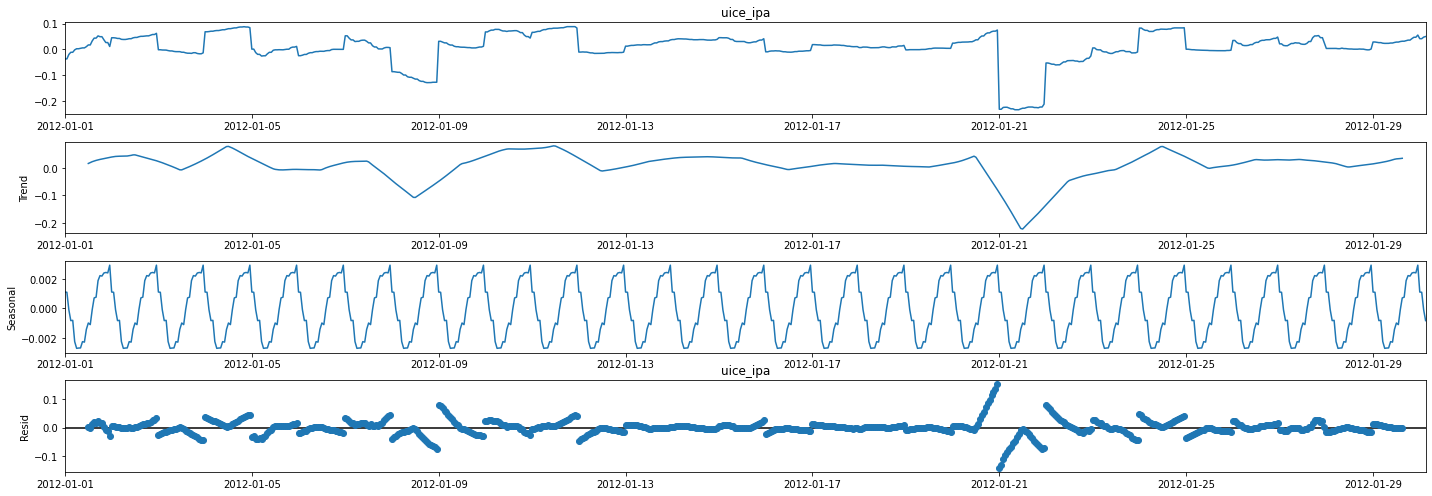

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


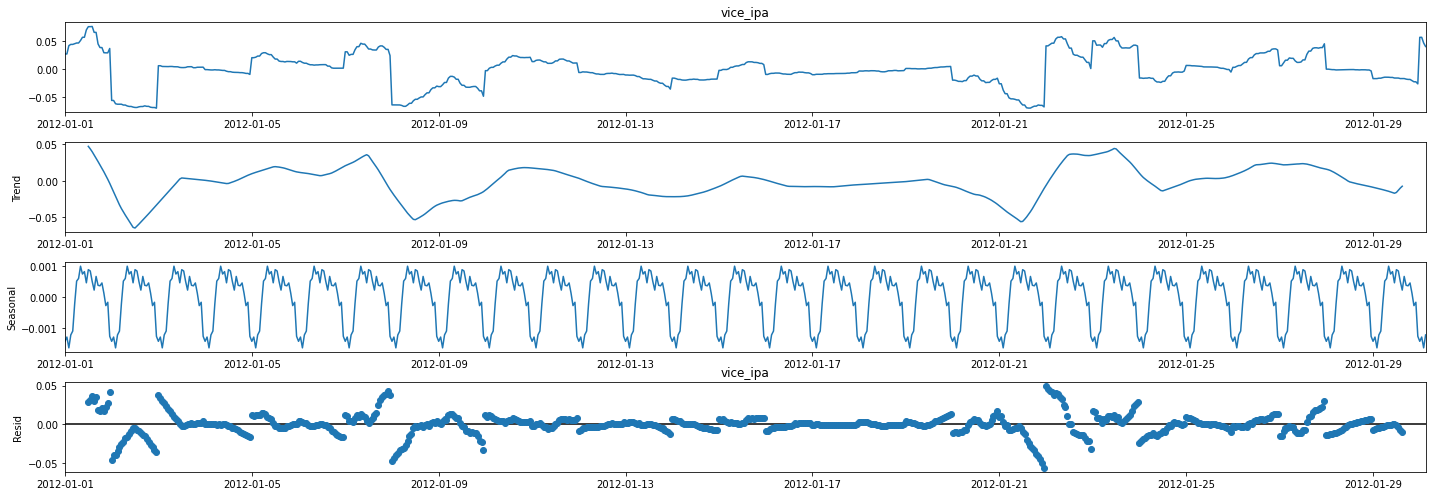

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


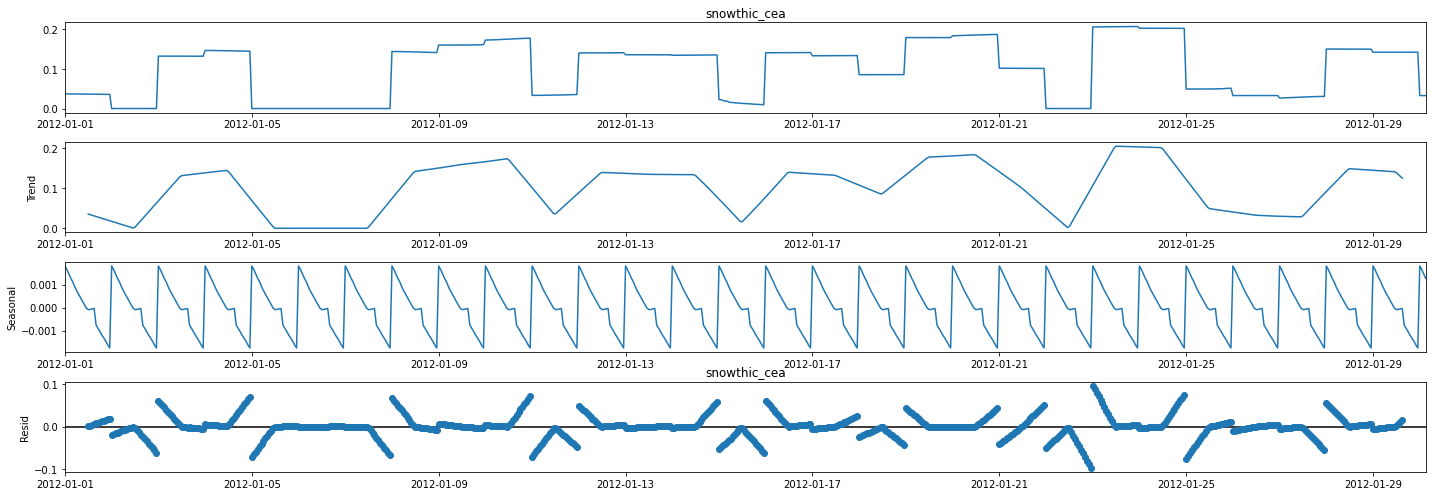

In [222]:
one_month = df[our_columns].iloc[:700, :].copy()
for column in one_month.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(one_month[column]).plot()
    plt.title(column)
    plt.show()

In [253]:
df_daily.index[900:][-1]

Timestamp('2014-12-29 00:00:00')

AIC: 353.770, HQIC: 357.439, BIC: 363.375


<Figure size 1440x504 with 0 Axes>

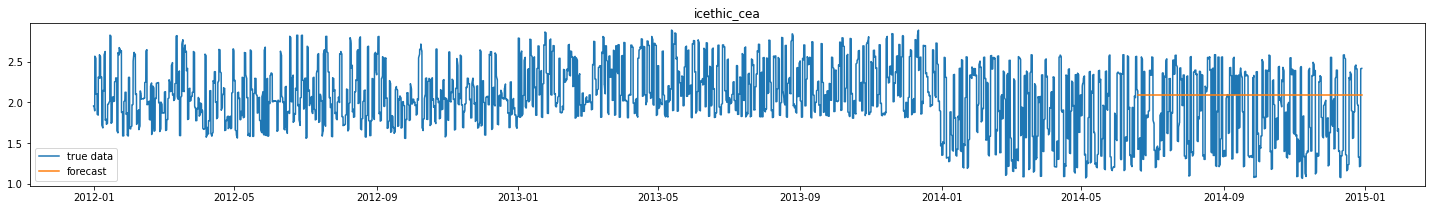

AIC: -3797.485, HQIC: -3793.816, BIC: -3787.880


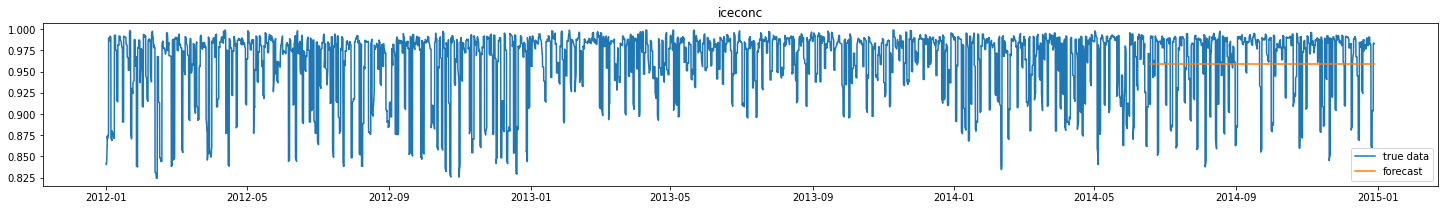

AIC: -3162.548, HQIC: -3158.879, BIC: -3152.944


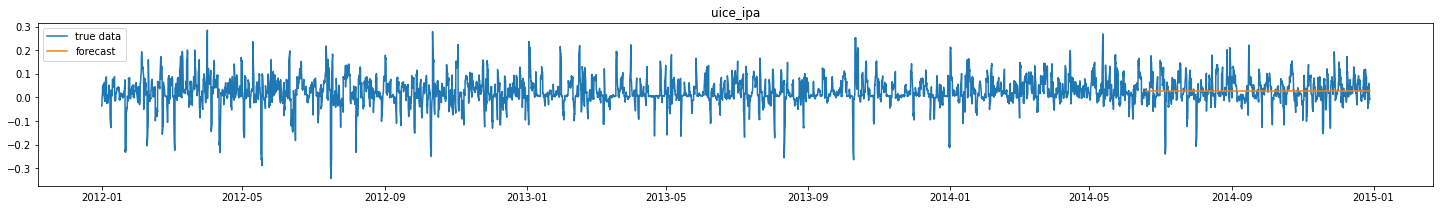

AIC: -4007.159, HQIC: -4003.490, BIC: -3997.555


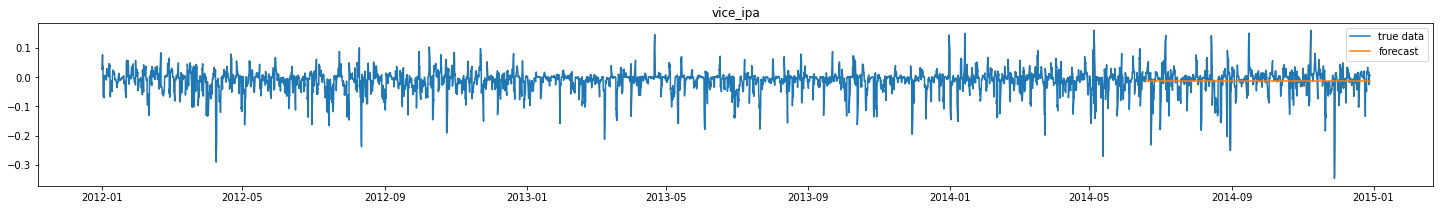

AIC: -2632.795, HQIC: -2629.126, BIC: -2623.190


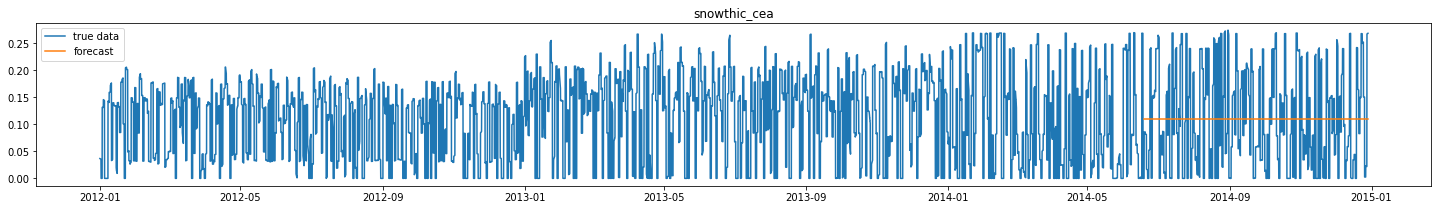

In [261]:
plt.figure()
for column in df_daily.columns:
    x = df_daily[column][:900]
    y = df_daily.index[900:]
    out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
    res = AutoReg(x, lags = 0).fit()
    print(out.format(res.aic, res.hqic, res.bic))
    predict = res.predict(y[0], y[-1])
    plt.subplots(figsize=(25, 3))
    plt.plot(df[column], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()
    

<AxesSubplot:xlabel='dt'>

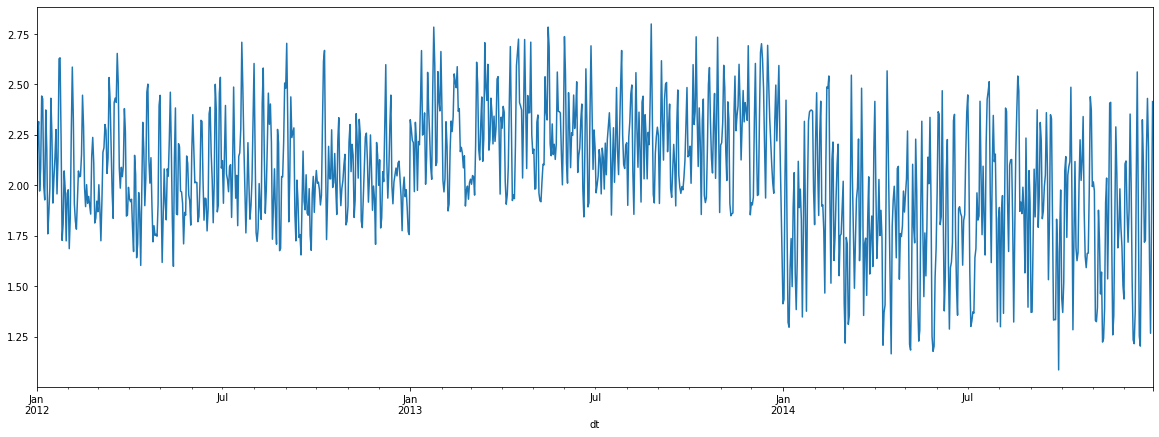

In [286]:
df_daily['icethic_cea'].plot()

                               SARIMAX Results                                
Dep. Variable:            icethic_cea   No. Observations:                  900
Model:                 ARIMA(3, 0, 7)   Log Likelihood                 208.987
Date:                Fri, 15 Apr 2022   AIC                           -393.974
Time:                        12:26:36   BIC                           -336.345
Sample:                    01-01-2012   HQIC                          -371.959
                         - 06-18-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0724      0.093     22.295      0.000       1.890       2.255
ar.L1          1.0248      0.365      2.811      0.005       0.310       1.739
ar.L2         -0.8627      0.475     -1.816      0.0

<Figure size 1440x504 with 0 Axes>

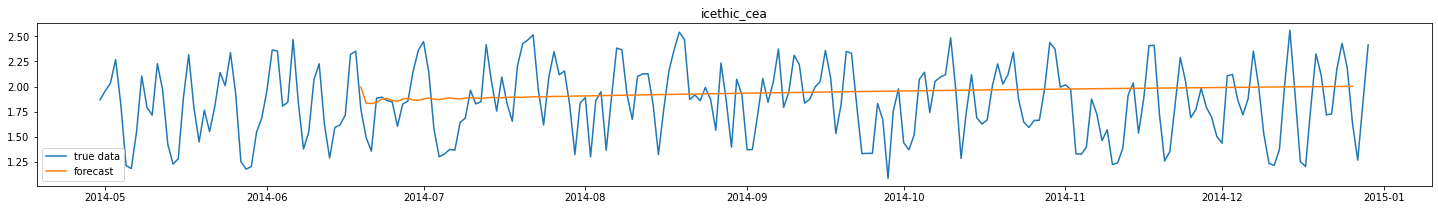

                               SARIMAX Results                                
Dep. Variable:                iceconc   No. Observations:                  900
Model:                 ARIMA(3, 0, 7)   Log Likelihood                2181.070
Date:                Fri, 15 Apr 2022   AIC                          -4338.140
Time:                        12:26:40   BIC                          -4280.511
Sample:                    01-01-2012   HQIC                         -4316.126
                         - 06-18-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9588      0.004    252.966      0.000       0.951       0.966
ar.L1          1.2339      0.317      3.892      0.000       0.613       1.855
ar.L2         -0.8729      0.490     -1.783      0.0

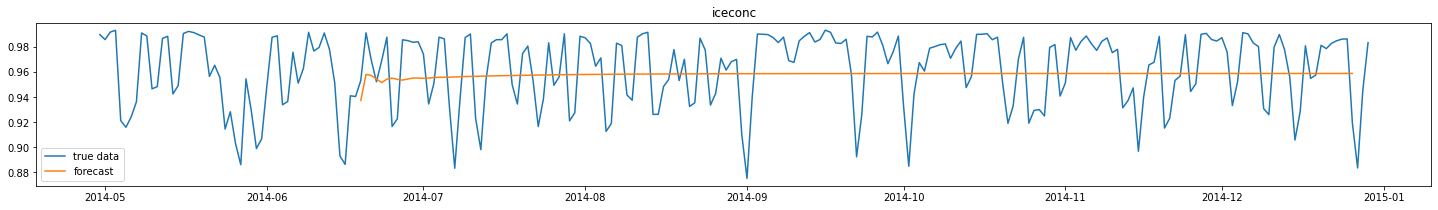

                               SARIMAX Results                                
Dep. Variable:               uice_ipa   No. Observations:                  900
Model:                 ARIMA(3, 0, 7)   Log Likelihood                1733.591
Date:                Fri, 15 Apr 2022   AIC                          -3443.183
Time:                        12:26:43   BIC                          -3385.554
Sample:                    01-01-2012   HQIC                         -3421.168
                         - 06-18-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.002     16.303      0.000       0.023       0.029
ar.L1          0.8693      0.344      2.529      0.011       0.196       1.543
ar.L2         -0.8223      0.388     -2.119      0.0

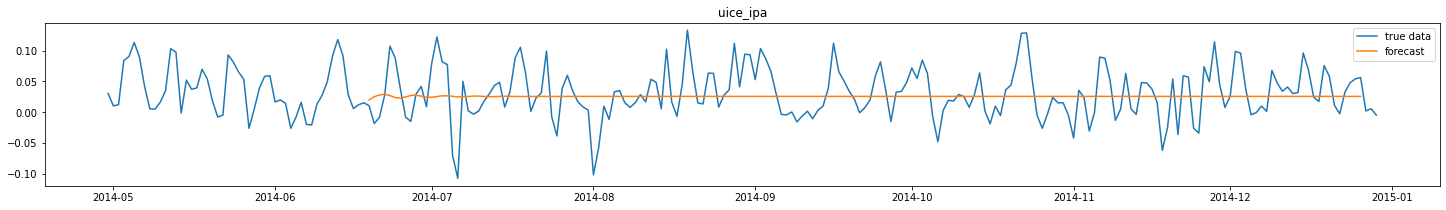

                               SARIMAX Results                                
Dep. Variable:               vice_ipa   No. Observations:                  900
Model:                 ARIMA(3, 0, 7)   Log Likelihood                2127.289
Date:                Fri, 15 Apr 2022   AIC                          -4230.579
Time:                        12:26:47   BIC                          -4172.950
Sample:                    01-01-2012   HQIC                         -4208.564
                         - 06-18-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.001    -10.859      0.000      -0.015      -0.011
ar.L1          0.6363      0.477      1.335      0.182      -0.298       1.570
ar.L2         -0.1007      0.609     -0.165      0.8

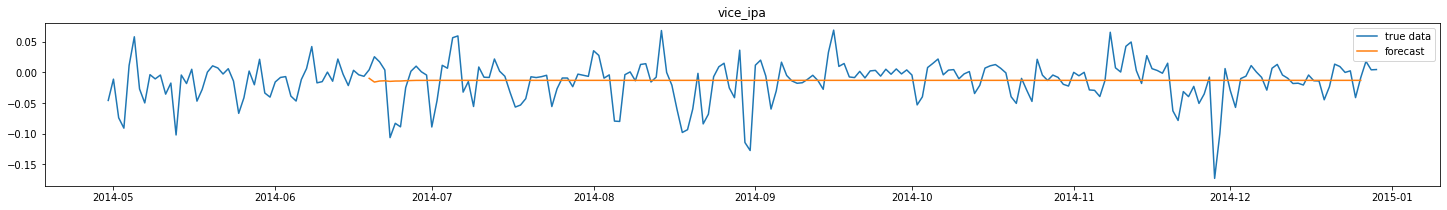

                               SARIMAX Results                                
Dep. Variable:           snowthic_cea   No. Observations:                  900
Model:                 ARIMA(3, 0, 7)   Log Likelihood                1594.272
Date:                Fri, 15 Apr 2022   AIC                          -3164.544
Time:                        12:26:50   BIC                          -3106.915
Sample:                    01-01-2012   HQIC                         -3142.529
                         - 06-18-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.003     31.996      0.000       0.104       0.117
ar.L1          0.4362      0.230      1.893      0.058      -0.016       0.888
ar.L2         -0.2910      0.223     -1.304      0.1

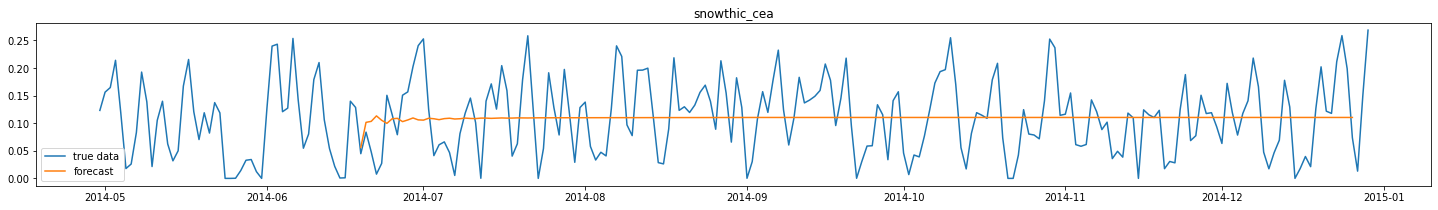

In [291]:
plt.figure()
for column in df_daily.columns:
    x = df_daily[column][:900]
    res = sm.tsa.arima.ARIMA(x, order=(3, 0, 7))
    model_fit = res.fit()
    print(model_fit.summary())
    predict = model_fit.predict(start = len(x), end = len(x)+190)
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column][850:], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()


In [293]:
parameters = product(range(0,8), repeat=3)
parameters_list = list(parameters)
print (u"Models to analyse:", len(parameters_list))

Models to analyse: 512


In [307]:
results = []
best_aic = 10000.0

for param in parameters_list:
    
    #try except for the case of wrong parameters
    try:
        model=sm.tsa.arima.ARIMA(df_daily['snowthic_cea'], order=param).fit()
        
    #print wrong parameters and go on
    # AIC criteria: 
    except ValueError:
            continue
    aic = model.aic

    # save best model, aic, parameters
    if (abs(aic) < abs(best_aic)):
        best_model = model
        best_aic = aic
        best_param = param
        print(best_aic)
    results.append([param, model.aic])
    
print(f'AIC value: {best_model.aic}')

-3126.3476664849404
-3088.2034937386775
-2345.4569535621495
-1360.177294640893
-242.61569080321658
-232.30652726136765
-215.7340285443836
-192.96037050566332
-189.72825262076483
-93.78229140698929
-86.55229109614385
-28.09067404772071
AIC value: -1492.6021402315175


In [334]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
result_table['abs_aic'] = abs(result_table['aic'])
best_pdq = result_table.sort_values(by = 'abs_aic', ascending=True)['parameters'].head(1).values
print(f'Found the best PDQ: {best_pdq}')
print(f'AIC value: {best_model.aic}\nThe best model with params: \n{best_model.params}')

Found the best PDQ: [(7, 7, 0)]
AIC value: -28.09067404772071
The best model with params: 
ar.L1    -2.793343
ar.L2    -4.734287
ar.L3    -5.594244
ar.L4    -5.035188
ar.L5    -3.344241
ar.L6    -1.558476
ar.L7    -0.382183
sigma2    0.055678
dtype: float64


                               SARIMAX Results                                
Dep. Variable:           snowthic_cea   No. Observations:                 1094
Model:                 ARIMA(7, 7, 0)   Log Likelihood                  22.045
Date:                Fri, 15 Apr 2022   AIC                            -28.091
Time:                        13:54:53   BIC                             11.839
Sample:                    01-01-2012   HQIC                           -12.976
                         - 12-29-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7933      0.028    -98.152      0.000      -2.849      -2.738
ar.L2         -4.7343      0.077    -61.814      0.000      -4.884      -4.584
ar.L3         -5.5942      0.129    -43.402      0.0

<Figure size 1440x504 with 0 Axes>

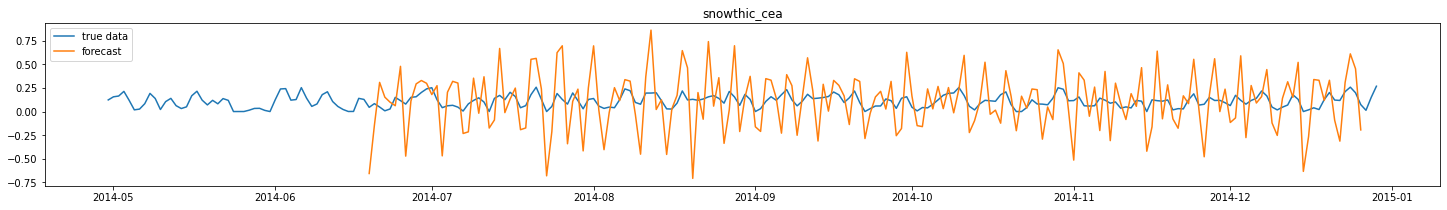

In [344]:
plt.figure()

x = df_daily['snowthic_cea'][:900]
print(best_model.summary())
predict = best_model.predict(start = len(x), end = len(x)+190)
plt.subplots(figsize=(25, 3))
plt.plot(df_daily['snowthic_cea'][850:], label = 'true data')
plt.plot(predict, label = 'forecast')
plt.legend()
plt.title('snowthic_cea')
plt.show()

-3126.3476664849404

In [ ]:
    x = df_daily[column][:900]
    res = sm.tsa.arima.ARIMA(x, order=(3, 0, 7))
    model_fit = res.fit()
    print(model_fit.summary())
    predict = model_fit.predict(start = len(x), end = len(x)+190)
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column][850:], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()